In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv (r'C:\Users\gogas\Desktop\dataset-HAR-PUC-Rio.csv' , 
                  sep = '\;', engine='python')


df.head()


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,"class,,"
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [165]:


# Get the list of columns and data types
df.info()

# Get the unique counts by gender
df.gender
df.gender = df.gender.map({ 'Woman':0 , 'Man':1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165632 entries, 0 to 165631
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user                165632 non-null  object
 1   gender              165632 non-null  object
 2   age                 165632 non-null  int64 
 3   how_tall_in_meters  165632 non-null  object
 4   weight              165632 non-null  int64 
 5   body_mass_index     165632 non-null  object
 6   x1                  165632 non-null  int64 
 7   y1                  165632 non-null  int64 
 8   z1                  165632 non-null  int64 
 9   x2                  165632 non-null  int64 
 10  y2                  165632 non-null  int64 
 11  z2                  165632 non-null  int64 
 12  x3                  165632 non-null  int64 
 13  y3                  165632 non-null  int64 
 14  z3                  165632 non-null  int64 
 15  x4                  165632 non-null  int64 
 16  y4

In [166]:
df.rename(columns = {'class,,':'class'}, inplace = True)

In [167]:
df

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,0,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,0,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,0,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,0,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,0,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,jose_carlos,1,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165628,jose_carlos,1,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165629,jose_carlos,1,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165630,jose_carlos,1,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [168]:
df['class'] = df['class'].map({'sitting':1, 'standing':2, 'walking':3,'standingup':4, 'sittingdown':5})

In [169]:
df

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,0,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,1
1,debora,0,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,1
2,debora,0,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,1
3,debora,0,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,1
4,debora,0,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,jose_carlos,1,75,"1,67",67,"24,0",2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,3
165628,jose_carlos,1,75,"1,67",67,"24,0",-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,3
165629,jose_carlos,1,75,"1,67",67,"24,0",-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,3
165630,jose_carlos,1,75,"1,67",67,"24,0",-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,3


In [170]:
#
##
##So, the columns that should be centered and normalized are likely 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 
#'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4'.

In [171]:
df = df.dropna()

In [172]:
df['body_mass_index'] = df['body_mass_index'].str.replace(',', '. ')
df['body_mass_index'] = df['body_mass_index'].str.replace(" ", "")

df['how_tall_in_meters'] = df['how_tall_in_meters'].str.replace(',', '. ')
df['how_tall_in_meters'] = df['how_tall_in_meters'].str.replace(" ", "")
df['body_mass_index'] = df['body_mass_index'].astype(float)
df['how_tall_in_meters'] = df['how_tall_in_meters'].astype(float)


In [173]:
df['body_mass_index'] = df['body_mass_index'].astype(float)
df['how_tall_in_meters'] = df['how_tall_in_meters'].astype(float)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165632 entries, 0 to 165631
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user                165632 non-null  object 
 1   gender              165632 non-null  int64  
 2   age                 165632 non-null  int64  
 3   how_tall_in_meters  165632 non-null  float64
 4   weight              165632 non-null  int64  
 5   body_mass_index     165632 non-null  float64
 6   x1                  165632 non-null  int64  
 7   y1                  165632 non-null  int64  
 8   z1                  165632 non-null  int64  
 9   x2                  165632 non-null  int64  
 10  y2                  165632 non-null  int64  
 11  z2                  165632 non-null  int64  
 12  x3                  165632 non-null  int64  
 13  y3                  165632 non-null  int64  
 14  z3                  165632 non-null  int64  
 15  x4                  165632 non-nul

In [175]:
df = df.drop(['user'], axis=1)

In [176]:
mean = np.mean(df, axis=0)
df_centered = df - mean


In [177]:
df_centered

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,-0.387956,7.735075,-0.019712,4.180569,2.411465,3.649319,3.706409,30.164449,64.827956,70.065911,156.055647,-12.423517,-0.517056,1.881641,17.641211,-10.374765,12.650985,-1.320397
1,-0.387956,7.735075,-0.019712,4.180569,2.411465,3.649319,5.706409,29.164449,66.827956,70.065911,157.055647,-31.423517,-0.517056,3.881641,18.641211,-11.374765,14.650985,-1.320397
2,-0.387956,7.735075,-0.019712,4.180569,2.411465,5.649319,8.706409,32.164449,75.827956,72.065911,160.055647,-30.423517,-0.517056,3.881641,16.641211,-11.374765,15.650985,-1.320397
3,-0.387956,7.735075,-0.019712,4.180569,2.411465,4.649319,7.706409,36.164449,72.827956,73.065911,159.055647,-30.423517,-0.517056,4.881641,14.641211,-10.374765,17.650985,-1.320397
4,-0.387956,7.735075,-0.019712,4.180569,2.411465,5.649319,7.706409,32.164449,74.827956,72.065911,160.055647,-30.423517,-0.517056,4.881641,14.641211,-11.374765,16.650985,-1.320397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,0.612044,36.735075,0.030288,-3.819431,-2.188535,8.649319,4.706409,-54.835551,79.827956,140.065911,75.055647,-2.423517,15.482944,-6.118359,-21.358789,15.625235,-0.349015,0.679603
165628,0.612044,36.735075,0.030288,-3.819431,-2.188535,5.649319,5.706409,-53.835551,70.827956,139.065911,76.055647,-0.423517,16.482944,-5.118359,-22.358789,14.625235,1.650985,0.679603
165629,0.612044,36.735075,0.030288,-3.819431,-2.188535,-3.350681,4.706409,-49.835551,68.827956,138.065911,71.055647,-17.423517,9.482944,-7.118359,-17.358789,12.625235,6.650985,0.679603
165630,0.612044,36.735075,0.030288,-3.819431,-2.188535,-8.350681,-2.293591,-58.835551,68.827956,140.065911,58.055647,-61.423517,50.482944,68.881641,-17.358789,8.625235,3.650985,0.679603


In [178]:
df = df_centered

In [179]:
from sklearn.preprocessing import MinMaxScaler

# specify columns to scale
cols_to_scale = ['age', 'body_mass_index','class','gender','how_tall_in_meters','weight',
                 'x1','x2','x3','x4','y1','y2','y3','y4','z1','z2','z3','z4']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# print scaled dataframe
df



,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,0.0,0.382979,0.307692,0.714286,1.00000,0.371779,0.451493,0.532544,0.487073,0.658867,0.809202,0.500994,0.596285,0.509286,0.801161,0.691176,0.789474,0.0
1,0.0,0.382979,0.307692,0.714286,1.00000,0.371779,0.453980,0.531558,0.489142,0.658867,0.810555,0.482107,0.596285,0.511241,0.802612,0.689542,0.793522,0.0
2,0.0,0.382979,0.307692,0.714286,1.00000,0.374233,0.457711,0.534517,0.498449,0.661330,0.814614,0.483101,0.596285,0.511241,0.799710,0.689542,0.795547,0.0
3,0.0,0.382979,0.307692,0.714286,1.00000,0.373006,0.456468,0.538462,0.495346,0.662562,0.813261,0.483101,0.596285,0.512219,0.796807,0.691176,0.799595,0.0
4,0.0,0.382979,0.307692,0.714286,1.00000,0.374233,0.456468,0.534517,0.497415,0.661330,0.814614,0.483101,0.596285,0.512219,0.796807,0.689542,0.797571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,1.0,1.000000,0.692308,0.428571,0.30303,0.377914,0.452736,0.448718,0.502585,0.745074,0.699594,0.510934,0.611926,0.501466,0.744557,0.733660,0.763158,0.5
165628,1.0,1.000000,0.692308,0.428571,0.30303,0.374233,0.453980,0.449704,0.493278,0.743842,0.700947,0.512922,0.612903,0.502444,0.743106,0.732026,0.767206,0.5
165629,1.0,1.000000,0.692308,0.428571,0.30303,0.363190,0.452736,0.453649,0.491210,0.742611,0.694181,0.496024,0.606061,0.500489,0.750363,0.728758,0.777328,0.5
165630,1.0,1.000000,0.692308,0.428571,0.30303,0.357055,0.444030,0.444773,0.491210,0.745074,0.676590,0.452286,0.646139,0.574780,0.750363,0.722222,0.771255,0.5


In [180]:
df

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,0.0,0.382979,0.307692,0.714286,1.00000,0.371779,0.451493,0.532544,0.487073,0.658867,0.809202,0.500994,0.596285,0.509286,0.801161,0.691176,0.789474,0.0
1,0.0,0.382979,0.307692,0.714286,1.00000,0.371779,0.453980,0.531558,0.489142,0.658867,0.810555,0.482107,0.596285,0.511241,0.802612,0.689542,0.793522,0.0
2,0.0,0.382979,0.307692,0.714286,1.00000,0.374233,0.457711,0.534517,0.498449,0.661330,0.814614,0.483101,0.596285,0.511241,0.799710,0.689542,0.795547,0.0
3,0.0,0.382979,0.307692,0.714286,1.00000,0.373006,0.456468,0.538462,0.495346,0.662562,0.813261,0.483101,0.596285,0.512219,0.796807,0.691176,0.799595,0.0
4,0.0,0.382979,0.307692,0.714286,1.00000,0.374233,0.456468,0.534517,0.497415,0.661330,0.814614,0.483101,0.596285,0.512219,0.796807,0.689542,0.797571,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,1.0,1.000000,0.692308,0.428571,0.30303,0.377914,0.452736,0.448718,0.502585,0.745074,0.699594,0.510934,0.611926,0.501466,0.744557,0.733660,0.763158,0.5
165628,1.0,1.000000,0.692308,0.428571,0.30303,0.374233,0.453980,0.449704,0.493278,0.743842,0.700947,0.512922,0.612903,0.502444,0.743106,0.732026,0.767206,0.5
165629,1.0,1.000000,0.692308,0.428571,0.30303,0.363190,0.452736,0.453649,0.491210,0.742611,0.694181,0.496024,0.606061,0.500489,0.750363,0.728758,0.777328,0.5
165630,1.0,1.000000,0.692308,0.428571,0.30303,0.357055,0.444030,0.444773,0.491210,0.745074,0.676590,0.452286,0.646139,0.574780,0.750363,0.722222,0.771255,0.5


In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# specify columns to scale
cols_to_scale = ['age', 'body_mass_index','class','gender','how_tall_in_meters','weight',
                 'x1','x2','x3','x4','y1','y2','y3','y4','z1','z2','z3','z4']

scaler.fit(df[cols_to_scale])

# transform your selected columns using the scaler
df[cols_to_scale] = scaler.transform(df[cols_to_scale])



In [182]:
df

,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,-0.796160,0.586711,-0.373190,0.370076,0.804956,0.314157,0.155107,0.765413,0.382612,0.341519,0.809348,-0.236030,-0.009548,0.041455,0.460471,-0.519554,0.956887,-1.112986
1,-0.796160,0.586711,-0.373190,0.370076,0.804956,0.314157,0.238804,0.740038,0.394416,0.341519,0.814534,-0.597004,-0.009548,0.085518,0.486573,-0.569633,1.108162,-1.112986
2,-0.796160,0.586711,-0.373190,0.370076,0.804956,0.486329,0.364349,0.816163,0.447534,0.351268,0.830093,-0.578005,-0.009548,0.085518,0.434369,-0.569633,1.183799,-1.112986
3,-0.796160,0.586711,-0.373190,0.370076,0.804956,0.400243,0.322500,0.917661,0.429828,0.356142,0.824907,-0.578005,-0.009548,0.107550,0.382165,-0.519554,1.335074,-1.112986
4,-0.796160,0.586711,-0.373190,0.370076,0.804956,0.486329,0.322500,0.816163,0.441632,0.351268,0.830093,-0.578005,-0.009548,0.107550,0.382165,-0.569633,1.259437,-1.112986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165627,1.256029,2.786384,0.573416,-0.338107,-0.730541,0.744589,0.196955,-1.391434,0.471142,0.682717,0.389259,-0.046043,0.285896,-0.134796,-0.557507,0.782491,-0.026399,0.572849
165628,1.256029,2.786384,0.573416,-0.338107,-0.730541,0.486329,0.238804,-1.366060,0.418024,0.677843,0.394446,-0.008046,0.304361,-0.112765,-0.583609,0.732412,0.124876,0.572849
165629,1.256029,2.786384,0.573416,-0.338107,-0.730541,-0.288448,0.196955,-1.264561,0.406220,0.672969,0.368514,-0.331023,0.175105,-0.156828,-0.453099,0.632255,0.503063,0.572849
165630,1.256029,2.786384,0.573416,-0.338107,-0.730541,-0.718880,-0.095983,-1.492933,0.406220,0.682717,0.301093,-1.166962,0.932179,1.517563,-0.453099,0.431940,0.276151,0.572849


In [183]:
from sklearn.model_selection import StratifiedKFold

# Set the number of folds for k-fold cross-validation
num_folds = 5

# Create a stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)


In [184]:
skf


StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [185]:

from sklearn.model_selection import train_test_split
X = df
y = df[['class']]

# Separating the 90% data for training data and 10% for testing data

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=0.10, random_state=7)


In [186]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [187]:
df.shape

(165632, 18)

In [204]:
from tensorflow.keras.optimizers import Adam

# Define number of input features
input_dim = 18

# Define number of classes
num_classes = 5

Οptimizer = Adam(learning_rate=0.001)

# Build the model
model_ce = Sequential()
model_ce.add(Dense(23, input_dim=input_dim, activation='relu'))
model_ce.add(Dense(32, activation='relu'))
model_ce.add(Dense(16, activation='relu'))
model_ce.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_ce.compile(loss='categorical_crossentropy', optimizer=Οptimizer, metrics=['accuracy'])

# Print model summary
model_ce.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 23)                437       
                                                                 
 dense_55 (Dense)            (None, 32)                768       
                                                                 
 dense_56 (Dense)            (None, 16)                528       
                                                                 
 dense_57 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,818
Trainable params: 1,818
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 9.8019e-04 - val_accuracy: 0.9998
Epoch 2/5
4659/4659 [==============================] - 9s 2ms/step - loss: 9.0728e-04 - accuracy: 0.9999 - val_loss: 5.1289e-04 - val_accuracy: 0.9999
Epoch 3/5
4659/4659 [==============================] - 9s 2ms/step - loss: 5.7367e-04 - accuracy: 0.9999 - val_loss: 2.4102e-04 - val_accuracy: 0.9999
Epoch 4/5
4659/4659 [==============================] - 8s 2ms/step - loss: 2.1445e-04 - accuracy: 1.0000 - val_loss: 5.3408e-04 - val_accuracy: 0.9999
Epoch 5/5
4659/4659 [==============================] - 9s 2ms/step - loss: 4.7775e-04 - accuracy: 0.9999 - val_loss: 5.2389e-06 - val_accuracy: 1.0000


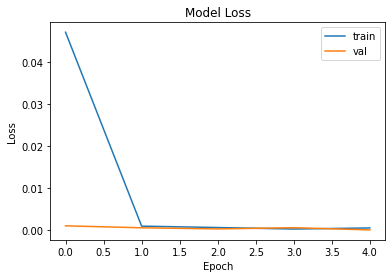

In [205]:
from keras.callbacks import EarlyStopping


# Train the model with backpropagation
# train model and save history
history_ce = model_ce.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# plot training and validation loss curves
plt.plot(history_ce.history['loss'], label='train')
plt.plot(history_ce.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Define number of input features
input_dim = 18

# Define number of classes
num_classes = 5

optimizer = Adam(lr=0.001, beta_1=0.6)

# Build the model
model_mse = Sequential()
model_mse.add(Dense(23, input_dim=input_dim, activation='relu'))
model_mse.add(Dense(32, activation='relu'))
model_mse.add(Dense(16, activation='relu'))
model_mse.add(Dense(num_classes, activation='linear'))

# Compile the model
model_mse.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model_mse.summary()



Epoch 1/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.1214 - accuracy: 0.5434 - val_loss: 0.1243 - val_accuracy: 0.5465
Epoch 2/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.1215 - accuracy: 0.5434 - val_loss: 0.1236 - val_accuracy: 0.5465
Epoch 3/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.1214 - accuracy: 0.5445 - val_loss: 0.1218 - val_accuracy: 0.5465
Epoch 4/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.1215 - accuracy: 0.5439 - val_loss: 0.1207 - val_accuracy: 0.5465
Epoch 5/5
4659/4659 [==============================] - 9s 2ms/step - loss: 0.1215 - accuracy: 0.5436 - val_loss: 0.1311 - val_accuracy: 0.5465


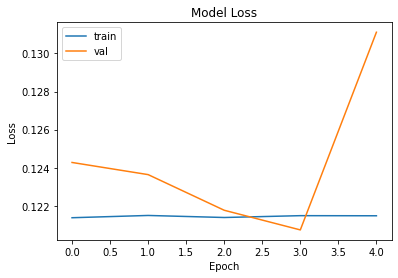

In [208]:
# Train the model with backpropagation
# train model and save history
history_mse = model_mse.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# plot training and validation loss curves
plt.plot(history_mse.history['loss'], label='train')
plt.plot(history_mse.history['val_loss'], label='val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()